## Class 2: Linear Algebra and Stats in Python (continued)

### Outline of this notebook
* **getting some data**
* **mean, median, mode**
* **variance and standard deviation**
* **covariance and correlation**
* **histograms**
* **scatter plots**
* **random variables and distributions**
* **the normal distribution - useful properties**
* **the exponential distribution - useful properties**
* **important properties of empirical distributions - skew and kurtosis**

When you look at any collection of data, you want to be able to look at just a few numbers that provide a useful indication of how the whole collection behaves.

Statistics is the study of those small sets of numbers that provide a useful indication of how any collection of numbers (arbitrarily large) behavies.

We call these collections of numbers **distributions** and the smaller set of numbers that describe them as the **properties of distributions**.

In [1]:
import numpy as np
from scipy import stats
import requests
import csv

%matplotlib inline
import seaborn as sns

Ok, lets get some data that we can actually work with:

In [2]:
#Get iris dataset from online
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data') #iris dataset on the internet
iris_data = [str.split(row.decode('utf-8'),",")for row in r.iter_lines()]

print("First five entries in iris_data:")
for row in iris_data[0:5]:
    print(row)
print("Last five entries in iris_data:")
for row in iris_data[-5:]:
    print(row)

First five entries in iris_data:
['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
Last five entries in iris_data:
['6.3', '2.5', '5.0', '1.9', 'Iris-virginica']
['6.5', '3.0', '5.2', '2.0', 'Iris-virginica']
['6.2', '3.4', '5.4', '2.3', 'Iris-virginica']
['5.9', '3.0', '5.1', '1.8', 'Iris-virginica']
['']


In [3]:
iris_data

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

We are going to have to clean it up a bit:

In [4]:
#Remove last line as it is empty
iris_data_cleaned = iris_data[:-1]

#Put last element in each entry into separate list
iris_names = [row[-1] for row in iris_data_cleaned]
print("First five entries in iris_names:")
for row in iris_names[0:5]:
    print(row)

#Put all elements but last in each entry into values list
iris_data_values = [row[:-1] for row in iris_data_cleaned]
print("First five entries in iris_data_cleaned:")
for row in iris_data_values[0:5]:
    print(row)

#Convert values into floats
iris_data_values_float = [[float(value) for value in row] for row in iris_data_values]
print("First five entries in iris_data_values_float:")
for row in iris_data_values_float[0:5]:
    print(row)

#Convert list of list of floats into matrix
iris_data_final = np.array(iris_data_values_float)
print("First five entries in iris_data_final:")
for row in iris_data_final[0:5]:
    print(row)

First five entries in iris_names:
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
First five entries in iris_data_cleaned:
['5.1', '3.5', '1.4', '0.2']
['4.9', '3.0', '1.4', '0.2']
['4.7', '3.2', '1.3', '0.2']
['4.6', '3.1', '1.5', '0.2']
['5.0', '3.6', '1.4', '0.2']
First five entries in iris_data_values_float:
[5.1, 3.5, 1.4, 0.2]
[4.9, 3.0, 1.4, 0.2]
[4.7, 3.2, 1.3, 0.2]
[4.6, 3.1, 1.5, 0.2]
[5.0, 3.6, 1.4, 0.2]
First five entries in iris_data_final:
[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]


In [5]:
iris_data_final  #it's a matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

`iris_data_final` contains the properly formatted numeric data, so we will be using that to illustrate all of the statistics going forward.

### mean, median, mode

The **mean** is the arithmetic average of a group of values, found by dividing the total of all values by the number of values.

The **median** is the middle value in a group of values, found by ordering the values from smallest to largest and locating the one that occurs in the middle. If the size of the group is even, it is found by averaging the middle two values.

The **mode** is the value that occurs most often in a group of values, and is found by counting the frequency of every distinct value in the group and outputting the one that occurs most frequently.

Let's compute each of these properties in turn on the columns in the `iris_data_final` matrix:

In [6]:
print("Shape of the data (rows,columns):",iris_data_final.shape)
print("Mean of each column:",iris_data_final.mean(axis=0)) #must pass in an axis argument, otherwise will compute mean of entire matrix
print("Median of each column:",np.median(iris_data_final,axis=0))
print("Mode of each column:",stats.mode(iris_data_final,axis=0)) #implied axis=0 for this function

Shape of the data (rows,columns): (150, 4)
Mean of each column: [5.84333333 3.054      3.75866667 1.19866667]
Median of each column: [5.8  3.   4.35 1.3 ]
Mode of each column: ModeResult(mode=array([[5. , 3. , 1.5, 0.2]]), count=array([[10, 26, 14, 28]]))


In [25]:
iris_data_final

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
np.median(iris_data_final,axis=1)

array([2.45, 2.2 , 2.25, 2.3 , 2.5 , 2.8 , 2.4 , 2.45, 2.15, 2.3 , 2.6 ,
       2.5 , 2.2 , 2.05, 2.6 , 2.95, 2.6 , 2.45, 2.75, 2.65, 2.55, 2.6 ,
       2.3 , 2.5 , 2.65, 2.3 , 2.5 , 2.5 , 2.4 , 2.4 , 2.35, 2.45, 2.8 ,
       2.8 , 2.3 , 2.2 , 2.4 , 2.3 , 2.15, 2.45, 2.4 , 1.8 , 2.25, 2.55,
       2.85, 2.2 , 2.7 , 2.3 , 2.6 , 2.35, 3.95, 3.85, 4.  , 3.15, 3.7 ,
       3.65, 4.  , 2.85, 3.75, 3.3 , 2.75, 3.6 , 3.1 , 3.8 , 3.25, 3.75,
       3.75, 3.4 , 3.35, 3.2 , 4.  , 3.4 , 3.7 , 3.75, 3.6 , 3.7 , 3.8 ,
       4.  , 3.7 , 3.05, 3.1 , 3.05, 3.3 , 3.9 , 3.75, 3.95, 3.9 , 3.35,
       3.55, 3.25, 3.5 , 3.8 , 3.3 , 2.8 , 3.45, 3.6 , 3.55, 3.6 , 2.75,
       3.45, 4.65, 3.9 , 4.45, 4.25, 4.4 , 4.8 , 3.5 , 4.6 , 4.15, 4.85,
       4.15, 4.  , 4.25, 3.75, 3.95, 4.25, 4.25, 5.25, 4.75, 3.6 , 4.45,
       3.85, 4.75, 3.8 , 4.5 , 4.6 , 3.8 , 3.95, 4.2 , 4.4 , 4.45, 5.1 ,
       4.2 , 3.95, 4.1 , 4.55, 4.5 , 4.3 , 3.9 , 4.25, 4.35, 4.1 , 3.9 ,
       4.55, 4.5 , 4.1 , 3.75, 4.1 , 4.4 , 4.05])

### variance and standard deviation

It is useful to get a sense of how the values in a dataset are spread about the average or the central value in that dataset. **Variance** and **standard deviation** are values that quantify that spread.

The **variance** of a set of values, **$\sigma^2$**, is the average of the square of the difference of the values in the dataset from the dataset's mean:

\begin{align}
\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

We square the differences to preserve the magnitude of the difference only (otherwise we would be adding and subtracting values, and lose the average magnitude). So, the variance is not on the same scale as the values themselves:

In [19]:
print("Variance of each column:\n",iris_data_final.var(axis=0)) #must pass in an axis argument, otherwise will compute mean of entire matrix

Variance of each column:
 [0.68112222 0.18675067 3.09242489 0.57853156]


In [20]:
np.var(iris_data_final,axis=0)

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

The **standard deviation**, $\sigma$, is the square root of the variance:

\begin{align}
\sigma = \sqrt\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

We use the **standard deviation** much more regularly than the **variance** because it is on the same scale as the original data:

In [21]:
print("Standard deviation of each column:\n",iris_data_final.std(axis=0))#must pass in an axis argument, otherwise will compute mean of entire matrix

Standard deviation of each column:
 [0.82530129 0.43214658 1.75852918 0.76061262]


### covariance and correlation

So far, we've been looking at statistical properties of individual collections of data (in our case, columns of the `iris_data_final` matrix) by themselves. However, it is also useful to quantify how two collections of data vary with each other. **Covariance** and **correlation** measure this exact quantity.

**Covariance**, like the variance, is a measure of spread, however it also measures how closely two datasets track each other. That is, **covariance** describes both how far the variables are spread out, and the nature of their relationship, whether they tend to increase and decrease together, or whether they do not track each other at all. Like **variance**,  the **covariance** is a squared quantity (again, to simply measure the magnitude of the spread and to avoid subtracting numbers from each other) so it is not on the same scale as the mean (and the **covariance** of different pairs of variables can have completely different scales):

\begin{align}
Cov(x,y) = \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)} {n}\
\end{align}

When we look at the covariance of a dataset, we compute what is called a **covariance matrix**.

This matrix is symmetric and tells us what all the paired covariance values are for every pair of rows (or columns) in our original matrix:

In [22]:
#have to take the transpose of iris_data_final, because np.cov computes row-based covariances
#so if we take the transpose, our columns become our rows!
iris_data_final_column_cov = np.cov(iris_data_final.T)
print("Original iris_data_final matrix shape:",iris_data_final.shape)
print("Columnar covariance matrix:\n",iris_data_final_column_cov,iris_data_final_column_cov.shape)

Original iris_data_final matrix shape: (150, 4)
Columnar covariance matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]] (4, 4)


#### Exercise Time!!
* Compute the row-based covariance matrix of `iris_data_final`. What does this matrix measure?

In [8]:
iris_data_final_row_cov = np.cov(iris_data_final)
print(iris_data_final_row_cov)

[[4.75       4.42166667 4.35333333 ... 2.915      2.475      2.6       ]
 [4.42166667 4.14916667 4.055      ... 2.95583333 2.50416667 2.62833333]
 [4.35333333 4.055      3.99       ... 2.68833333 2.28166667 2.39666667]
 ...
 [2.915      2.95583333 2.68833333 ... 4.18916667 3.65083333 3.835     ]
 [2.475      2.50416667 2.28166667 ... 3.65083333 3.20916667 3.375     ]
 [2.6        2.62833333 2.39666667 ... 3.835      3.375      3.55      ]]


**Correlation** is sort of like **standard deviation** generalized to pairs of datasets.

Really, the **correlation** is a **covariance** scaled by each dataset's **standard deviation**, so that it can only take on values from -1 to +1. This allows us to compare two pairs of variables and quickly tell if one pair of datasets is more related than an other (since both values are scaled to the same range!):

\begin{align}
r(x,y) = \frac{cov(x,y)} {\sigma_x\sigma_y}\
\end{align}

Or this:

\begin{align}
r(x,y) = \frac{\frac{\sum_{i=1}^{n}(x_i-\mu_x)(y_i-\mu_y)} {n}} {\sigma_x\sigma_y}\
\end{align}

A positive correlation indicates the sets of values change together (when one increases or decreases the other does the same). A negative correlation indicates that the variables change in opposite directions (when one increases the other decreases).

Just like the **covariance**, when we compute **correlations** for some dataset, we really compute a **correlation matrix** over all of the distinct sets of values in the dataset. The **correlation matrix** is symmetric, just like the **covariance matrix**:

In [12]:
#again, we have to take the transpose because otherwise we will get row-wise correlations.
iris_data_final_column_corr = np.corrcoef(iris_data_final.T)
print("Original iris_data_final matrix shape:",iris_data_final.shape)
print("Columnar correlation matrix:\n",iris_data_final_column_corr,iris_data_final_column_corr.shape)

Original iris_data_final matrix shape: (150, 4)
Columnar correlation matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]] (4, 4)


Lets take a look at the correlation matrix visually too:

The correlation matrix for the iris dataset:


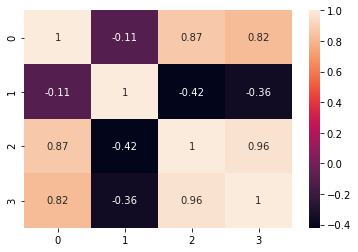

In [11]:
sns.heatmap(iris_data_final_column_corr, annot = True)
print("The correlation matrix for the iris dataset:")

#### Exercise Time!
* Compute the row-based correlation matrix for `iris_data_final`.
* Visualize the correlation matrix as a heatmap. Notice anything?
* I've loaded in vertebral_data into a `NumPy` matrix called `vertebral_values_final` for you below:
    * Compute the mean of each column. 
    * Compute the median of each column.
    * Compute the mode of each column.
    * What would it mean if the mean and the median for a given column are very far apart?
    * What is useful about knowing the mode?
    * Compute the variance and standard deviation of each column.
    * Generate the columnar covariance and correlation matrices for this matrix.
    * Do any columns appear to change together (based on their covariances/correlations)?
    * What conclusions can we draw from these column-based statistics?
    * If we had computed all of the row-based statistics here, what would their interpretation be?

In [13]:
iris_data_final_row_cor = np.corrcoef(iris_data_final)
print("iris_data_final row_based correlation matrix: \n",iris_data_final_row_cor)

iris_data_final row_based correlation matrix: 
 [[1.         0.99599866 0.99997391 ... 0.65347343 0.6339168  0.63315839]
 [0.99599866 1.         0.99660709 ... 0.70898277 0.68625679 0.68483481]
 [0.99997391 0.99660709 1.         ... 0.65755616 0.63763128 0.6368058 ]
 ...
 [0.65347343 0.70898277 0.65755616 ... 1.         0.99570813 0.99446012]
 [0.6339168  0.68625679 0.63763128 ... 0.99570813 1.         0.99991588]
 [0.63315839 0.68483481 0.6368058  ... 0.99446012 0.99991588 1.        ]]


<AxesSubplot:>

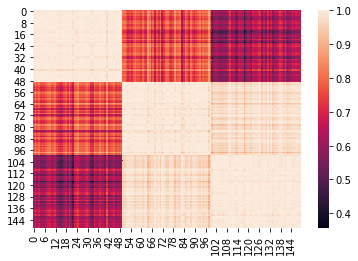

In [14]:
sns.heatmap(iris_data_final_row_cor)

In [15]:
with open('../data/vertebral_column_2_categories.dat', 'r') as f:
    vertebral_data = [row for row in csv.reader(f)]

vertebral_data_parsed = [str.split(row[0],' ') for row in vertebral_data]
vertebral_names = [row[-1] for row in vertebral_data_parsed]
vertebral_values = [row[:-1] for row in vertebral_data_parsed]
vertebral_values_float = [[float(value) for value in row] for row in vertebral_values]
vertebral_values_final = np.array(vertebral_values_float)

In [16]:
vertebral_values_final

array([[ 63.03,  22.55,  39.61,  40.48,  98.67,  -0.25],
       [ 39.06,  10.06,  25.02,  29.  , 114.41,   4.56],
       [ 68.83,  22.22,  50.09,  46.61, 105.99,  -3.53],
       ...,
       [ 61.45,  22.69,  46.17,  38.75, 125.67,  -2.71],
       [ 45.25,   8.69,  41.58,  36.56, 118.55,   0.21],
       [ 33.84,   5.07,  36.64,  28.77, 123.95,  -0.2 ]])

In [21]:
col_mean = vertebral_values_final.mean(axis = 0)
print("column based mean: \n", col_mean)

col_median = np.median(vertebral_values_final, axis = 0)
print("column based median: \n", col_median)

col_mode = stats.mode(vertebral_values_final, axis = 0)
print("column based mode: \n", col_mode)



column based mean: 
 [ 60.49648387  17.54290323  51.93070968  42.95387097 117.92054839
  26.29674194]
column based median: 
 [ 58.69   16.36   49.565  42.405 118.265  11.765]
column based mode: 
 ModeResult(mode=array([[ 42.52,   5.27,  35.  ,  56.31, 110.71,  -4.08]]), count=array([[2, 2, 4, 4, 2, 2]]))


In [24]:
col_var = vertebral_values_final.var(axis = 0)
print("column based variance: \n", col_var)

col_std = vertebral_values_final.std(axis = 0)
print("column based std: \n", col_std)

column based variance: 
 [ 296.12512022   99.83976125  343.13176724  179.58897405  176.78712776
 1406.11914842]
column based std: 
 [17.20828638  9.99198485 18.52381622 13.40108108 13.29613206 37.49825527]


In [27]:
col_cov = np.cov(vertebral_values_final.T)
print("column based cov: \n", col_cov)

col_corr = np.corrcoef(vertebral_values_final.T)
print("column based cov: \n", col_corr)

column based cov: 
 [[ 297.08345394  108.53543225  229.38417726  188.54553825  -56.8085013
   413.49563996]
 [ 108.53543225  100.16286727   80.35870376    8.37274018    4.35311361
   149.54583959]
 [ 229.38417726   80.35870376  344.24222603  149.02426229  -19.85822628
   371.8890897 ]
 [ 188.54553825    8.37274018  149.02426229  180.17016814  -61.16183028
   263.95508126]
 [ -56.8085013     4.35311361  -19.85822628  -61.16183028  177.35925439
   -13.04174707]
 [ 413.49563996  149.54583959  371.8890897   263.95508126  -13.04174707
  1410.66969582]]
column based cov: 
 [[ 1.          0.62918583  0.71728567  0.81495867 -0.24748403  0.63873253]
 [ 0.62918583  1.          0.43276036  0.06232651  0.03266026  0.39783986]
 [ 0.71728567  0.43276036  1.          0.59838882 -0.08036768  0.53366497]
 [ 0.81495867  0.06232651  0.59838882  1.         -0.3421465   0.5235714 ]
 [-0.24748403  0.03266026 -0.08036768 -0.3421465   1.         -0.02607331]
 [ 0.63873253  0.39783986  0.53366497  0.5235714  -

In [12]:
#This is where you write the code for your exercise.
#Make sure you execute the cell just above this one so that vertebral_values_final is populated.
pass

### histograms

A regular histogram is a very powerful, simple way to get a sense of the kinds of values a single set of data is comprised of. 

Let's take a look at the histogram of values for the first column in `iris_data_final`: 

Histogram of first column of the iris dataset:


/Users/wentingdeng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


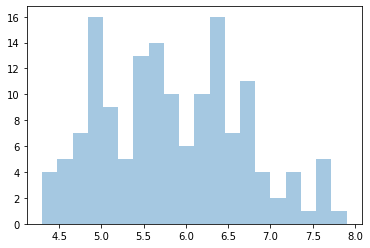

In [28]:
sns.distplot(iris_data_final[:,0],kde=False,bins=20) #bin can be adjusted
print("Histogram of first column of the iris dataset:")

Histogram of first column of the iris dataset:


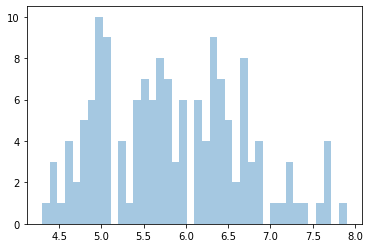

In [32]:
sns.distplot(iris_data_final[:,0],kde=False,bins=40) #bin can be adjusted
print("Histogram of first column of the iris dataset:")

The **x-axis shows us the actual range of values that the column takes on**. It looks like the first column ranges from just over 4 to just under 8.

The **y-axis is a frequency count of the number of rows in the column that fall into each vertical bin**. So, the first bin (furthest to the left), which ranges from ~4.25 to ~4.75 contains 11 values.

We can also make **cumulative histograms**, which give us a graphical way to see what fraction of the datapoints are below or above a certain value:

Cumulative frequency histogram of 1st column:


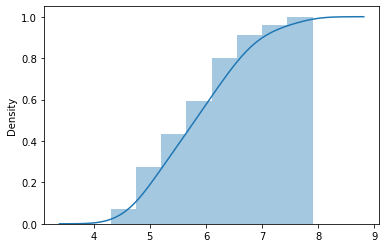

In [33]:
sns.distplot(iris_data_final[:,0], hist_kws={"cumulative":True},kde_kws={"cumulative":True})
print("Cumulative frequency histogram of 1st column:")

### scatter plot

When you want to visualize how two columns vary together, you can use a **scatter plot**. 

A scatter plot simply plots the value for each column per-row for the two columns you've chosen.

Every dot in the scatter plot is an individual row. 

Let's generate the scatter plot for the first two columns in the iris dataset:

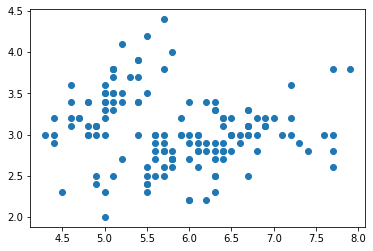

In [28]:
sns.mpl.pyplot.scatter(iris_data_final[:,0], iris_data_final[:,1])

You can combine both a **scatter plot** and a **histogram** for a pair of columns very effectively using a `jointplot`:

Scatter plot with histograms for the first two columns in the iris dataset:


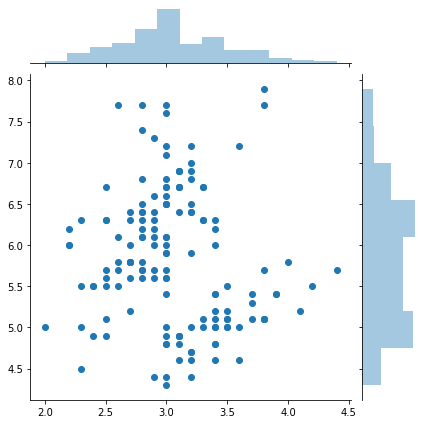

In [29]:
sns.jointplot(iris_data_final[:,1], iris_data_final[:,0],stat_func=None)
print("Scatter plot with histograms for the first two columns in the iris dataset:")

#### Exercise Time!
* Using the `vertebral_values_final` dataset:
    * Compute the column-wise correlation matrix
    * Visualize the scatter plot for two columns that are positively correlated
    * Visualize the scatter plot for two columns that are negatively correlated (anti-correlated)

In [34]:
col_corr = np.corrcoef(vertebral_values_final.T)
print(col_corr)

[[ 1.          0.62918583  0.71728567  0.81495867 -0.24748403  0.63873253]
 [ 0.62918583  1.          0.43276036  0.06232651  0.03266026  0.39783986]
 [ 0.71728567  0.43276036  1.          0.59838882 -0.08036768  0.53366497]
 [ 0.81495867  0.06232651  0.59838882  1.         -0.3421465   0.5235714 ]
 [-0.24748403  0.03266026 -0.08036768 -0.3421465   1.         -0.02607331]
 [ 0.63873253  0.39783986  0.53366497  0.5235714  -0.02607331  1.        ]]


cor of the first and the fourth col


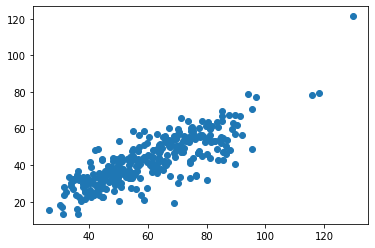

In [36]:
sns.mpl.pyplot.scatter(vertebral_values_final[:,0], vertebral_values_final[:, 3])
print("cor of the first and the fourth col")

cor of the fourth and the third col


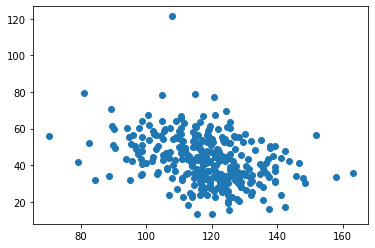

In [40]:
sns.mpl.pyplot.scatter(vertebral_values_final[:, 4], vertebral_values_final[:, 3])
print("cor of the fourth and the third col")

## random variables and distributions 

A **random variable** is a variable whose value is subject to variations due to chance. A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability. [random variable wiki](https://en.wikipedia.org/wiki/Random_variable)

There are two kinds of random variables: **discrete** and **continuous**

You know about **discrete** random variables, because you've flipped a coin (at some point in your life).

For an unbiased coin, the random variable can take on the values **heads** or **tails**, each with probability $p= 0.5$ but you don't know when it will take on the value. Let's say we flipped a coin ten times, how many heads will we get?:

In [50]:
n_trials = 10
prob_heads = 0.5
num_heads = np.random.binomial(n_trials, prob_heads)
print("Num heads:",num_heads)
print("Fraction heads:",float(num_heads)/n_trials) #this should be different for most people

Num heads: 3
Fraction heads: 0.3


All of us should have different numbers! That's because you can only talk about the probabilities, not the outcomes (you only know the outcome of an experiment after it happens).

What about **continuous** random variables?

A **continuous random variable** is a random variable where the data can take infinitely many values.

Think about how long it takes you to make your bed every morning. The experiment "how long it takes Sergey to make his bed" is a **continuous random variable** because it can take Sergey one of an infinitely many distinct times (30 seconds, 2.54 minutes, 0 minutes because he doesnt wake up on time and runs to work, etc.).

Let's look at the amount of time it took Sergey to make his bed over the last week:

In [46]:
sergey_bed_making_minutes = np.random.exponential(size=7) ## This is generating 7 experiments from a specific probability distribution
print(sergey_bed_making_minutes) # Everyone's values should be different, compare with your neighbor to make sure!

[0.07334745 0.17554894 0.11464506 0.49349443 0.97314377 2.76402148
 0.56693002]


#### Exercise Time!

* Generate 100 coin flips, what fraction of them come up heads?
* Generate 1,000 coin flips, what fraction of them come up heads?
* Generate 100,000 coin flips, what fraction of them come up heads? Notice a pattern?
* Generate 100 bed making experiments, whats the average bed making time?
* Generate 1,000 bed making experiments, whats the average bed making time?
* Generate 100,000 bed making experiments, whats the average bed making time? Notice a pattern?

In [25]:
pass

A **probability distribution** is a table or an equation that links each outcome of a statistical experiment with its probability of occurrence. [probability distribution wiki](https://en.wikipedia.org/wiki/Probability_distribution)

That is, it is a distribution of probabilities over the values that a **random variable** can take on.

There are lots of different kinds of distributions that statisticians have identified and studied. We will talk about just a few of them.

**All of data science boils down to trying to find/capture differences between probability distributions across classes of objects, and combining those differences across many distributions into aggregate predictions.**

### the binomial distribution

The **binomial distribution** is a distribution over discrete values. It has two parameters, `n` and `p`, and is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success (yes) with probability `p`.

A success/failure experiment is also called a Bernoulli experiment or Bernoulli trial; when n = 1 (a single coin flip), the binomial distribution is a Bernoulli distribution  [binomial distribution wiki](https://en.wikipedia.org/wiki/Binomial_distribution)

So, heres the approximate probability distribution of the number of heads in 10 coin flips.

We are going to generate the distribution by simulating 10,000 experiments where we flip a coin 10 times:

A binomial distribution for the number of heads in 10 coin flips:


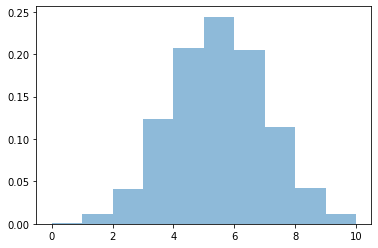

In [55]:
n_trials_binomial=10000
binomial_data = np.random.binomial(n_trials,prob_heads,n_trials_binomial)
sns.mpl.pyplot.hist(binomial_data,density=True,alpha=0.5)
print("A binomial distribution for the number of heads in 10 coin flips:")

### the normal distribution

The normal distribution is the most important distribution in all of statistics. It is a continuous probability distribution, unlike the binomial, which is discrete.

It's super important because as datasets become larger and larger and larger, they tend to look more and more like the normal distribution.

The normal distribution is fully specified by 2 parameters, $\mu$ (its mean) and $\sigma$ (its standard deviation).

Nothing in the world actually perfectly mirrors a normal distribution, because its an idealized, mathematical object. It is simply a theoretical approximation of the kinds of things we tend to see in the world. However, there are many datasets that behave very similarly to a normal distribution. [normal distribution wiki](https://en.wikipedia.org/wiki/Normal_distribution)

100000 values sampled from the normal distribution with mean=0 standard deviation=1:


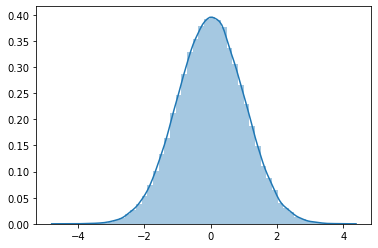

In [57]:
mu = 0
sigma = 1
n_samples = 100000
normal_data = np.random.normal(mu, sigma, n_samples)
sns.distplot(normal_data)
print("100000 values sampled from the normal distribution with mean=0 standard deviation=1:")

CDF of normal distribution:


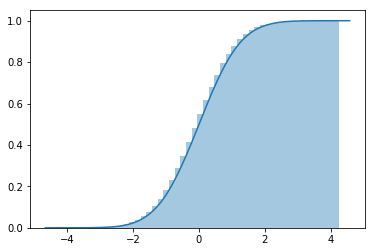

In [28]:
sns.distplot(normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
print("CDF of normal distribution:")

Altering the $\mu$ of the distribution alters its location:

100000 values sampled from three normal distributions with different mean=-3,0,5 and same standard deviation= 1:


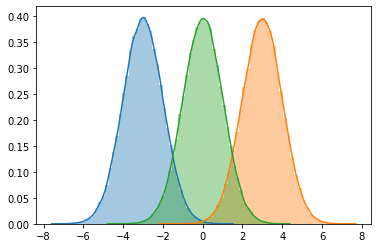

In [58]:
negative_mu = -3
positive_mu = 3
negative_mu_normal_data = np.random.normal(negative_mu, sigma, n_samples)
positive_mu_normal_data = np.random.normal(positive_mu, sigma, n_samples)
sns.distplot(negative_mu_normal_data)
sns.distplot(positive_mu_normal_data)
sns.distplot(normal_data)

print("100000 values sampled from three normal distributions with different mean=-3,0,5 and same standard deviation= 1:")

CDF of three normal distributions with different mean=-3,0,5 and same standard deviation= 1:


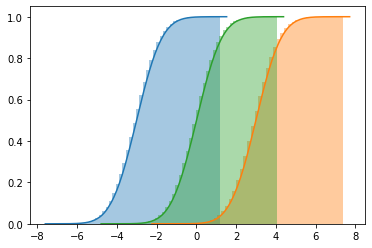

In [59]:
sns.distplot(negative_mu_normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(positive_mu_normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
print("CDF of three normal distributions with different mean=-3,0,5 and same standard deviation= 1:")

Altering the $\sigma$ of the distribution alters its width:

100,000 values sampled from three normal distributions with the same mean = 0 but different standard deviations = 1,3,5:


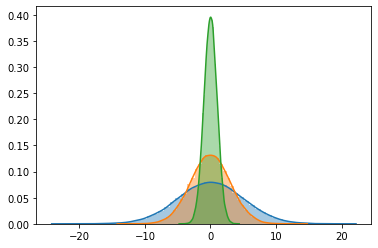

In [60]:
larger_sigma = 3
largest_sigma = 5
#Generate 2 collections of 100,000 samples from each distribution. 
larger_sigma_normal_data = np.random.normal(mu, larger_sigma, n_samples)
largest_sigma_normal_data = np.random.normal(mu, largest_sigma, n_samples)
#plot all 3 distributions on the same plot
sns.distplot(largest_sigma_normal_data)
sns.distplot(larger_sigma_normal_data)
sns.distplot(normal_data)
print("100,000 values sampled from three normal distributions with the same mean = 0 but different standard deviations = 1,3,5:")

CDF for three normal distributions with the same mean = 0 but different standard deviations = 1,3,5:


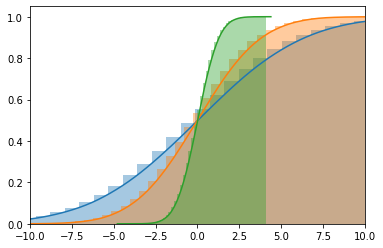

In [61]:
sns.distplot(largest_sigma_normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(larger_sigma_normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(normal_data, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.mpl.pyplot.xlim((-10,10))
print("CDF for three normal distributions with the same mean = 0 but different standard deviations = 1,3,5:")

### the exponential distribution

The **exponential distribution** is another very common distribution (and the one we used for my bed-making example). In stats-speak, it is the probability distribution that describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate. [exponential distribution wiki]()

An example exponential distribution would describe the time between airplanes landing and taking off at LaGuardia airport during hours that the airport is operating.

The exponential distribution is interesing because it has the property known as being **memoryless**. This means that knowing the history of the distribution has no effect on being able to predict what will happen next.

If the average time between airplane landing/takeoff is 125s, but for the past 5 times it was 30s, 42s, 50s, 10s, and 40s, your best guess about the next successive take/off landing time difference is still 125s (there are no hot streaks in airplane landings).

The standard exponential distribution:


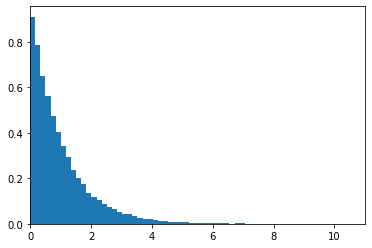

In [63]:
e = np.random.exponential(size=n_samples)
sns.mpl.pyplot.hist(e,bins=100,density=True)
sns.mpl.pyplot.xlim((0,11))
print("The standard exponential distribution:")

CDF of exponential distribution:


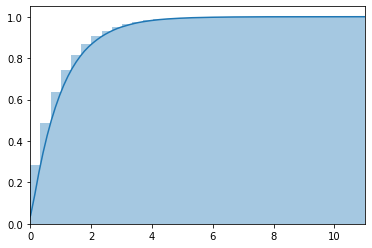

In [64]:
sns.distplot(e, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.mpl.pyplot.xlim((0,11))
print("CDF of exponential distribution:")

100000 values sampled from three exponential distributions with beta=1,3,5:


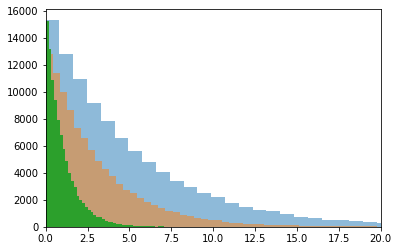

In [69]:
larger_beta = 3
largest_beta = 5
e2 = np.random.exponential(scale = larger_beta, size=n_samples)
e3 = np.random.exponential(scale = largest_beta, size=n_samples)
sns.mpl.pyplot.hist(e3,bins=100,alpha=0.5)
sns.mpl.pyplot.hist(e2,bins=100,alpha=0.5)
sns.mpl.pyplot.hist(e,bins=100)
sns.mpl.pyplot.xlim((0,20))
print("100000 values sampled from three exponential distributions with beta=1,3,5:")

CDF of three exponential distributions with beta=1,3,5


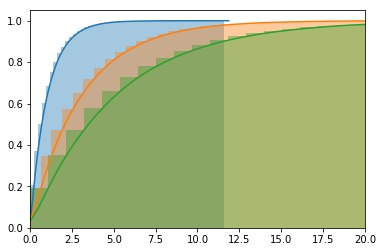

In [37]:
sns.distplot(e, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(e2, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.distplot(e3, hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.mpl.pyplot.xlim((0,20))
print("CDF of three exponential distributions with beta=1,3,5")

**FYI:** $\beta$ is the same as $\frac {1} {\lambda}$ for the other common parameterization of the exponential distribution. 

I like to use $\beta$ instead of $\lambda$ because $\beta$ is much more interpretable.

It is simply the rate/mean/standard deviation of the distribution. $\beta$ is also known as the **survival parameter** of the distribution, because if the distribution is used to model a process that takes a certain time to occur, it is the mean **survival** time of that process.

### the uniform distribution

The final distribution we will talk about is the **uniform distribution**. It simply describes cases where all values have the exact same frequency. It is a useful distribution because it is used for unbiased sampling (in cases where sampling is necessary).

Here's an example uniform distribution over the values between 0 and 1:

The uniform distribution for the range of values between 0 and 1:


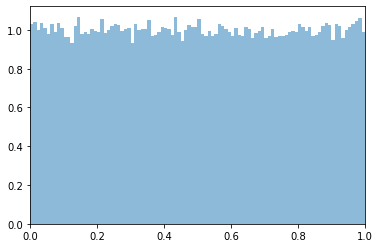

In [70]:
uni = np.random.uniform(size=n_samples)
sns.mpl.pyplot.hist(uni,bins=100,alpha=0.5,density=True)
sns.mpl.pyplot.xlim((0,1))
print("The uniform distribution for the range of values between 0 and 1:")

### Skewness

We are now going to talk about shape properties of all probability distributions. These are the two most common properties that

**Skewness** is a measure of how "skewed" a distribution is. Right, what is "skew"? Really, it measures how asymmetrical a given distribution is around its mean value, and can only be computed for continuous distributions. [skewness wiki](https://en.wikipedia.org/wiki/Skewness)

Here are two examples of skewness, demonstrating positive and negative skew:

![Skewness](./images/skewness_example.png)

Hopefully, you can tell that if these two examples were completely un-skewed, then they would follow the grey dotted lines for the distributions. Positive and negative skew is in reference to the tails of the distributions. **Positive skew** means that the right tail (the part greater than the mean) is bigger than it would be without skew. **Negative skew** means that the left tail (the part of the distribution less than the mean) is bigger than it would be without skew.

### Kurtosis

**Krutosis** is a measure of the "heavy-tailedness" of a given probability distribution. [kurtosis wiki](https://en.wikipedia.org/wiki/Kurtosis)

![Kurtosis](./images/kurtosis_example.png)